## 第八章 字符串

字符串不像整数、浮点数和布尔型。字符串是一个*序列* (sequence) ，这就意味着它是其他值的一个有序的集合。在这章中，你将学习怎么去访问字符串里的字符，同时你也会学习到字符串提供的一些方法。

## 8.1 字符串是一个序列

字符串是由字符组成的序列。你可以用括号运算符一次访问一个字符：

In [3]:
fruit = 'banana'
letter = fruit[1]

第 2 条语句从 `fruit` 中选择索引为 1 的字符并将它赋给 `letter` 。

括号中的表达式被称作*索引* (index)。索引指出在序列中你想要哪个字符 (因此而得名)。

但可能得到的不像你期望那样：

In [5]:
letter

'a'

对大多数人来说，`'banana' `的第一个字母是 `b` 而不是 `a`。但是对于计算机科学家，索引是从字符串起点开始的位移量1 ，第一个字母的位移量就是 0。

In [7]:
letter = fruit[0]
letter

'b'

所以 `b `是 `'banana'` 的第 0 个字母，`a` 是第一个字母，`n` 是第二个字母。
你可以使用一个包含变量名和运算符的表达式作为索引：

In [12]:
i = 1
print(fruit[i])
print(fruit[i+1])

a
n


索引值必须使用整数。否则你会得到错误信息：

In [15]:
letter = fruit[1.5]

TypeError: string indices must be integers

## 8.2 len

`len` 是一个内建函数，它返回字符串中的字符的数量：

In [18]:
fruit = 'banana'
len(fruit)

6

为了获得某个字符串中最后一个字符，你可以尝试这样操作：

In [20]:
length = len(fruit)
last = fruit[length]

IndexError: string index out of range

出现 `IndexError` 的原因在于 `'banana'` 中没有索引值为 6 的字母。由于我们从 0 开始计数，六个字母的编号是从 0 到 5 。为了获得最后一个字符，你必须将length 减去一：

In [22]:
last = fruit[length - 1]
last

'a'

你也可以使用负数索引，即从字符串的末尾倒着往前数。表达式 `fruit[−1]` 返回的是最后一个字母，`fruit[−2]` 返回倒数第二个字母，以此类推。

## 8.3 使用for循环遍历

许多计算中需要一个字符一个字符地处理字符串。通常计算从字符串的头部开始，依次选择每个字符，对其做一些处理，然后继续直到结束。这种处理模式被称作遍历 (traversal) 。编写遍历的方法之一是使用 `while` 循环：

In [26]:
index = 0
while index < len(fruit):
    letter = fruit[index]
    print(letter)
    index = index + 1

b
a
n
a
n
a


该循环遍历字符串并在每行显示一个字符串。该循环的条件是 `index < len(fruit)`，所以当 `index` 和字符串的长度相等时，条件为假，循环体不被执行。被访问的最后一个字符的索引为 `len(fruit)−1`，这也是字符串的最后一个字符。

我们做个练习，编写一个函数，接受一个字符串作为实参，按照从后向前的顺序显示字符，每行只显示一个。

编写遍历的另一种方法是使用 `for` 循环：

In [27]:
for letter in fruit:
    print(letter)

b
a
n
a
n
a


每次循环时，字符串中的下一个字符被赋值给变量 `letter` 。循环继续，直到没有剩余的字符串了。

下面的例子演示了如何使用拼接 (字符串相加) 和 `for` 循环生成一个字母表序列 (即按照字母表顺序排列)。在 Robert McCloskey 的书《Make Way for Ducklings》中，小鸭子的名字是 Jack、Kack、Lack、Mack、Nack、Ouack、Pack 和 Quack。此循环按顺序输出这些名字：

In [31]:
prefixes = 'JKLMNOPQ'
suffix = 'ack'

for letter in prefixes:
    print(letter + suffix)

Jack
Kack
Lack
Mack
Nack
Oack
Pack
Qack


当然，输出并不完全正确，因为 “Ouack” 和 “Quack” 拼写错了。我们做个练习，修改这个程序，解决这个问题。

In [32]:
prefixes = ['J','K','L','M','N','Ou','P','Qu']
suffix = 'ack'

for letter in prefixes:
    print(letter + suffix)

Jack
Kack
Lack
Mack
Nack
Ouack
Pack
Quack


## 8.4 字符串切片

字符串的一个片段被称作*切片* (slice)。选择一个切片的操作类似于选择一个字符：

In [34]:
s = 'Monty Python'
print(s[0:5])
print(s[6:12])

Monty
Python


操作符 `[n:m]` 返回从第 `n` 个字符到第 `m` 个字符的字符串片段，包括第一个，但是不包括最后一个。这个行为违反直觉，但是将指向两个字符之间的索引，想象成图 8.1 中那样或许有帮助。
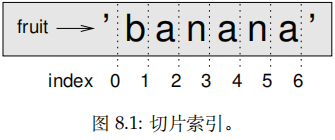

如果你省略第一个索引 (冒号前面的值)，切片起始于字符串头部。如果你省略第二个索引，切片一直到字符串结尾：

In [35]:
fruit = 'banana'
print(fruit[:3])
print(fruit[3:])

ban
ana


如果第一个索引大于或等于第二个，结果是空字符串3 ，用两个引号表：

In [36]:
fruit[3:3]

''

一个空字符串不包括字符而且长度为 0，但除此之外，它和其它任何字符串一样。

## 8.5 字符串是不可变的

你会很想在赋值语句的左边使用 `[]`，来改变字符串的一个字符。例如：

In [38]:
greeting = 'Hello, world!'
greeting[0] = 'J'

TypeError: 'str' object does not support item assignment

错误信息中的 “object (对象)” 是那个字符串，“item (元素)’’ 是你要赋值的字符。目前，我们认为对象和值是同样的东西，但是我们后面将改进此定义 (详见 10.10 节)。

出现此错误的原因是字符串是**不可变**的，这意味着你不能改变一个已存在的字符串。你最多只能创建一个新的字符串，在原有字符串的基础上略有变化。

In [40]:
greeting = 'Hello, world!'
new_greeting = 'J' + greeting[1:]
new_greeting

'Jello, world!'

上面的示例中，我们将一个新的首字母拼接到 greeting 的一个切片上。它不影响原字符串。

## 8.6 搜索

下面的函数起什么作用？

In [43]:
def find(word, letter):
    index = 0
    while index < len(word):
        if word[index] == letter:
            return index
        index = index + 1
    return -1

在某种意义上，`find` 和 `[]` 运算符相反。与接受一个索引并提取相应的字符不同，它接受一个字符并找到该字符所在的索引。如果没有找到该字符，函数返回 `−1`。

这是我们第一次在循环内部看见 `return` 语句。如果 `word[index] == letter`，函数停止循环并马上返回。

如果字符没出现在字符串中，那么程序正常退出循环并返回 `−1`。

这种计算模式——遍历一个序列并在找到寻找的东西时返回——被称作*搜索* (search)。

我们做个练习修改 `find` 函数使得它能接受第三个参数即从何处开始搜索的索引。

In [45]:
def find(word, letter, n):
    index = n
    if n > len(word):
        return -1
    
    while index < len(word):
        if word[index] == letter:
            return index
        index = index + 1
    return -1

## 8.7 循环和计数

下面的程序计算字母 a 在字符串中出现的次数：

In [47]:
word = 'banana'
count = 0
for letter in word:
    if letter == 'a':
        count = count + 1
print(count)

3


此程序演示了另一种被称作*计数器* (counter) 的计算模式。变量 `count` 初始化为` 0` ，然后每次出现 `a `时递增。当循环结束时，`count` 包含了字母 `a` 出现的总次数。

我们做一个练习，将这段代码封装在一个名为 `count` 的函数中，并泛化该函数，使其接受字符串和字母作为实参。

然后重写这个函数，不再使用字符串遍历，而是使用上一节中三参数版本的 find 函数。

In [85]:
def count(word):
    count = 0
    for i in range(len(word)):
        if word[i] == 'a':
            count = count + 1
    return count

def count_by_find(word):
    count = 0
    loc = 0
    while loc != -1:
        loc = find(word, 'a', loc+1)
        if loc != -1:
            count = count + 1
    return count

In [86]:
count('What a wonderful world')

2

In [87]:
count_by_find('What a wonderful world')

2

## 8.8 字符串方法

字符串提供了可执行多种有用操作的*方法* (method) 。方法和函数类似，接受实参并返回一个值，但是语法不同。例如，`upper` 方法接受一个字符串，并返回一个都是大写字母的新字符串。

不过使用的不是函数语法 `upper(word)` ，而是方法的语法 `word.upper()`。

In [89]:
world = 'banana'
new_word = word.upper()
new_word

'BANANA'

点标记法的形式指出方法的名字，`upper`，以及应用该方法的字符串的名字，`word`。空括号表明该方法不接受实参。

这被称作方法*调用* (invocation)；此例中，我们可以说是在 `word` 上调用 `upper` 。

事实上，有一个被称为 `find` 的字符串方法，与我们之前写的函数极其相似。

In [117]:
word = 'banana'
index = word.find('a')
index

1

此例中，我们在 `word` 上调用 `find` ，并将我们要找的字母作为参数传入。

事实上，`find `方法比我们的函数更通用；它还可以查找子字符串，而不仅仅是字符：

In [118]:
word.find('na')

2

`find` 默认从字符串的首字母开始查找，它还可以接受第二个实参，即从何处开始的索引。

In [119]:
word.find('na', 3)

4

这是一个*可选参数*(optional argument) 的例子；`find` 也可以接受结束查找的索引作为第三个实参：

In [120]:
name = 'bob'
name.find('b', 1, 2)

-1

此次搜索失败，因为 `'b'` 没有出现在索引 `1–2` 之间 (不包括`2`)。一直搜索到第二个索引，但是并不搜索第二个索引，这使得` find` 跟切片运算符的行为一致。

## 8.9 in运算符


单词 `in` 是一个布尔运算符，接受两个字符串。如果第一个作为子串出现在第二个中，则返回 `True`：

In [121]:
'a' in 'banana'

True

In [122]:
'seed' in 'banana'

False

例如下面的函数打印所有既出现在 `word1` 中也出现在 `word2` 中的字母：

In [123]:
def in_both(word1, word2):
    for letter in word1:
        if letter in word2:
            print(letter)

变量名挑选得当的话，Python 代码有时候读起来像是自然语言。你可以这样读此循环，‘‘对于 (每个) 在 (第一个) 单词中的字母，如果 (该) 字母 (出现) 在 (第二个) 单词中，打印 (该) 字母’’。

如果你比较 `'apples'` 和 `'oranges'`，你会得到下面的结果：

In [124]:
in_both('apples', 'oranges')

a
e
s


## 8.10 字符串比较

关系运算符也适用于字符串。可以这样检查两个字符串是否相等：

In [125]:
if word == 'banana':
    print('All right, bananas.')

All right, bananas.


其它的关系运算符对于按字母序放置单词也很有用：

In [126]:
if word < 'banana':
    print('Your word, ' + word + ', comes before banana.')
elif word > 'banana':
    print('Your word, ' + word + ', comes after banana.')
else:
    print('All right, bananas')

All right, bananas


Python 处理大写和小写字母的方式和人不同。所有的大写字母出现在所有小写字母之前，所以：

In [127]:
word = 'Pineapple'
if word < 'banana':
    print('Your word, ' + word + ', comes before banana.')
elif word > 'banana':
    print('Your word, ' + word + ', comes after banana.')
else:
    print('All right, bananas')

Your word, Pineapple, comes before banana.


## 8.11 调试

当你使用索引遍历序列中的值时，正确地指定遍历的起始和结束点有点困难。下面是一个用来比较两个单词的函数，如果一个单词是另一个的倒序，则返回 `True` ，但其中有两个错误：

In [129]:
def is_reverse(word1, word2):
    if len(word1) != len(word2):
        return False
    
    i = 0
    j = len(word2)
    
    while j > 0:
        if word1[i] != word2[j]:
            return False
        i = i+1
        j = j-1
    
    return True

第一条 `if` 语句检查两个单词是否等长。如果不是，我们可以马上返回 `False` 。否则，在函数其余的部分，我们可以假定单词是等长的。这是 6.8节中提到的监护人模式的一个例子。

`i` 和 `j` 是索引：`i` 向前遍历 `word1`，`j` 向后遍历 `word2`。如果我们找到两个不匹配的字母，我们可以立即返回 `False`。如果我们完成整个循环并且所有字母都匹配，我们返回 `True` 。

如果我们用单词 “pots” 和 “stop” 测试该函数，我们期望返回 `True` ，但是却得到一个`IndexError`：

In [130]:
is_reverse('pots', 'stop')

IndexError: string index out of range

为了调试该类错误，我第一步是在错误出现的行之前，打印索引的值。

现在当我再次运行该程序时将获得更多的信息：

In [133]:
def is_reverse(word1, word2):
    if len(word1) != len(word2):
        return False
    
    i = 0
    j = len(word2)
    
    while j > 0:
        print(i, j)
        
        if word1[i] != word2[j]:
            return False
        i = i+1
        j = j-1
    
    return True

is_reverse('pots', 'stop')

0 4


IndexError: string index out of range

第一次循环时，`j` 的值是 4，超出字符串 `'post'` 的范围了。最后一个字符的索引是` 3`，所以 `j` 的初始值应该是 `len(word2)−1 `。

如果我解决了这个错误，然后运行程序，将获得如下输出：

In [134]:
def is_reverse(word1, word2):
    if len(word1) != len(word2):
        return False
    
    i = 0
    j = len(word2)-1
    
    while j > 0:
        print(i, j)
        
        if word1[i] != word2[j]:
            return False
        i = i+1
        j = j-1
    
    return True

is_reverse('pots', 'stop')

0 3
1 2
2 1


True

这次我们获得了正确的答案，但是看起来循环只运行了三次，这很奇怪。画栈图可以帮我们更好的理解发生了什么。在第一次迭代期间，`is_reverse` 的栈帧如图 8.2 所示。

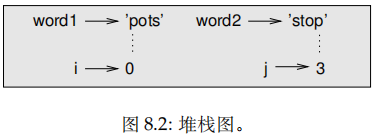

我对堆栈图做了些调整，重新排列了栈帧中的变量，增加了虚线来说明 `i` 和 `j `的值表`word1` 和 `word2` 中的字符。

从这个堆栈图开始，在纸上运行程序，每次迭代时修改 `i` 和 `j `的值。查找并解决这个函数的中第二个错误。

## 8.12 术语表

**对象 (object)：**变量可以引用的东西。现在你将对象和值等价使用。

**序列 (sequence)：**一个有序的值的集合，每个值通过一个整数索引标识。

**元素 (item)：**序列中的一个值。

**索引 (index)：**用来选择序列中元素 (如字符串中的字符) 的一个整数值。在 Python 中，索引从 0 开始。

**切片 (slice)：**以索引范围指定的字符串片段。

**空字符串 (empty string)：**一个没有字符的字符串，长度为 0，用两个引号表示。

**不可变性 (immutable)：** 元素不能被改变的序列的性质。

**遍历 (traversal)：** 对一个序列的所有元素进行迭代，对每一元素执行类似操作。搜索 (search)： 一种遍历模式，当找到搜索目标时就停止。

**计数器 (counter)：** 用来计数的变量，通常初始化为 0，并以此递增。

**方法调用 (invocation)：** 执行一个方法的声明。

**可选参数 (optional argument)：** 一个函数或者一个方法中不必要指定的参

## 8.13 练习

**Exercise 8.1.** 点击如下链接，阅读字符串方法的文档。为了确保你理解他们是怎么工作的，可以尝试使用其中的一些方法。`strip` 和`replace` 尤其有用。

文档中使用了可能会引起困惑的句法。例如，在`find(sub[, start[, end]])` 中，方括号意味着这是可选参数。所以，`sub` 是必填参数，但是`start` 是可选的，而且如果你提供了`start`，也不一定必须提供`end`。

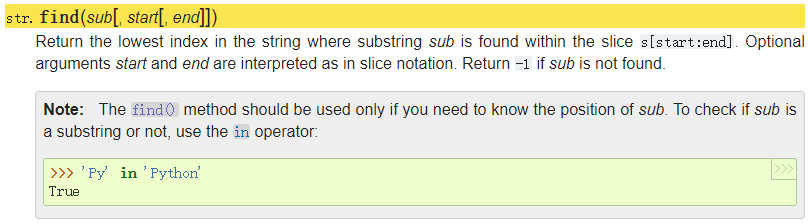

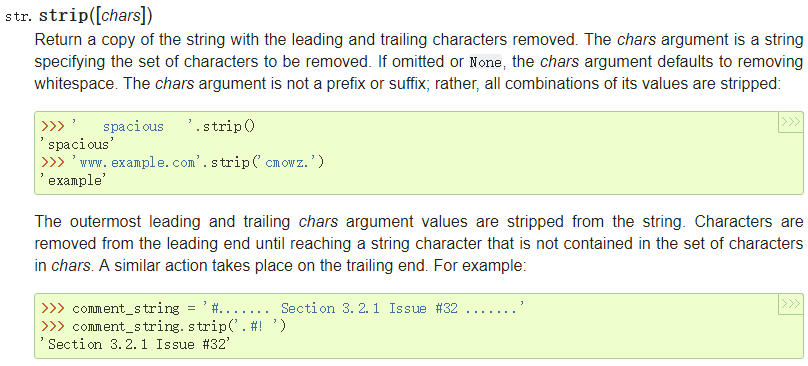

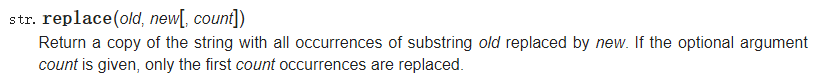

**Exercise 8.2.** 有一个字符串方法叫`count `，它类似于之前8.7 节中的`counter` 。阅读这个方法的文档，写一个计算`'banana'` 中`a `的个数的方法调用。

In [138]:
def counter(word):
    return word.count('a')

counter('banana')

3

**Exercise 8.3.** 一个字符串切片可以接受指定步长的第三个索引; 也就是连续字符间空格的个数。步长为 2，意味着每隔一个字符；步长为 3，意味着每隔两个字符，以此类推。

In [140]:
fruit = 'banana'
fruit[0:5:2]

'bnn'

步长为`−1` 就是从单词的尾部开始进行，所以切片`[::−1]` 生成一个倒序的字符串。利用这个习惯用法，将习题 6.3中`is_palindrome` 函数改写为一行代码版。

In [144]:
def is_palindrome(word):
    return word == word[::-1]

is_palindrome('bob')

True

**Exercise 8.4.** 下面这些函数，都是**用于** 检查一个字符串是否包含一些小写字母的，但是其中至少有一些是错误的函数。检查每个函数，描述这个函数实际上做了什么 ( 假设形参是字符串）。

In [153]:
##检查字符串是否包含小写字母
def any_lowercase1(s):
    for c in s:
        if c.islower():
            return True
        else:
            return False

##一定返回True
def any_lowercase2(s):
    for c in s:
        if 'c'.islower():
            return 'True'
        else:
            return 'False'

##检查最后一个字母是否小写
def any_lowercase3(s):
    for c in s:
        flag = c.islower()
    return flag

##检查是否存在小写字母
def any_lowercase4(s):
    flag = False
    for c in s:
        flag = flag or c.islower()
    return flag

##检查字符串是否全为小写字母
def any_lowercase5(s):
    for c in s:
        if not c.islower():
            return False
    return True

**Exercise 8.5.** 凯撒密码 (Caesar cypher) 是一种弱加密方式，它将每一个字母偏移固定的位置。偏移一个字母，指的是按着字母表偏移，如果需要的话再从尾部跳转至首字母，所以 ‘A’ 偏移三个位置即为 ‘D’，‘Z’ 偏移一个位置是 ‘A’。

要偏移一个单词，可以将其中每一个字母偏移相同的量。例如，“cheer” 偏移 7 个位置后变成了 “jolly”，“melon” 偏移 -10 个位置变成了 “cubed”。在电影《2001：太空奥德赛 (2001: A Space Odyssey)》 中，飞船上的电脑叫做 HAL，也就是 IBM 偏移 1 个位置后的单词。

编写一个叫`rotate_word` 的函数，接受一个字符串和一个整数作为形参，并返回原字符串按照给定整数量偏移后得到的一个新字符串。

你可能想用内置函数`ord` ，它可以将字符转化成数值代码，还有`chr`，它可以将数值代码转化成字符. 字母表的字母以字母表顺序编码，例如:

In [157]:
ord('c') - ord('a')

2

因为`'c'` 是字母表中的第二个字母。但是请注意：大写字母的数值代码是不同的。网上一些可能冒犯人的笑话有时以 ROT13 编码，即以 13 为偏移量的凯撒密码。如果你不是很容易就被冒犯，那么可以找些这样的笑话，并解码：

In [159]:
def rotate_letter(letter, n):
    if letter.isupper():
        start = ord('A')
    elif letter.islower():
        start = ord('a')
    else:
        return letter
    
    c = ord(letter) - start
    i = (c + n) % 26 + start
    return chr(i)

def rotate_word(word, n):
    res = ''
    for letter in word:
        res += rotate_letter(letter, n)
    return res

print(rotate_word('cheer', 7))
print(rotate_word('melon', -10))
print(rotate_word('sleep', 9))

jolly
cubed
bunny
